# Final Exam

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github//monicanm/DATA1401-Spring-2020/blob/master/Exams/Final/Final.ipynb)

We will be using the [John Hopkins COVID 19 Repository](https://github.com/CSSEGISandData/COVID-19) for our final.

**Question 1**: GIT isn't the optimal place for storing data, but nonetheless it often gets used in this way. The [John Hopkins COVID 19 Repository](https://github.com/CSSEGISandData/COVID-19) is about 1 GB of data, which is rather large. A GIT repository potentially keeps several copies of the same data. The following commands will clone the repository and remove the additional copies, leaving about 300 MB of data: 

In [548]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [571]:
!git clone https://github.com/CSSEGISandData/COVID-19.git
!rm -rf COVID-19/.git

fatal: destination path 'COVID-19' already exists and is not an empty directory.


Technically, you only need to perform this operation once. But since you are working on Google Colab, the data will be lost between sessions, unless you copy the data into your Google Drive. Download the data and copy it into your Google Drive, then comment the cell above so you don't download the data again next time you run the notebook. Note that once you copy the data, the path (location on the file system) with be different that what is assumed in the rest of this notebook. Update the following variable to reflect the change in location of the data:

In [550]:
data_path="./COVID-19/"

In [572]:
data_path

'./COVID-19/'

**Question 2**: Look through [JHU CSSE COVID-19 Dataset](https://github.com/CSSEGISandData/COVID-19/tree/master/csse_covid_19_data) page to get an understanding of the contents of the dataset. You will find daily world reports:

In [573]:
!ls $data_path/csse_covid_19_data/csse_covid_19_daily_reports

01-22-2020.csv	03-29-2020.csv	06-04-2020.csv	08-10-2020.csv	10-16-2020.csv
01-23-2020.csv	03-30-2020.csv	06-05-2020.csv	08-11-2020.csv	10-17-2020.csv
01-24-2020.csv	03-31-2020.csv	06-06-2020.csv	08-12-2020.csv	10-18-2020.csv
01-25-2020.csv	04-01-2020.csv	06-07-2020.csv	08-13-2020.csv	10-19-2020.csv
01-26-2020.csv	04-02-2020.csv	06-08-2020.csv	08-14-2020.csv	10-20-2020.csv
01-27-2020.csv	04-03-2020.csv	06-09-2020.csv	08-15-2020.csv	10-21-2020.csv
01-28-2020.csv	04-04-2020.csv	06-10-2020.csv	08-16-2020.csv	10-22-2020.csv
01-29-2020.csv	04-05-2020.csv	06-11-2020.csv	08-17-2020.csv	10-23-2020.csv
01-30-2020.csv	04-06-2020.csv	06-12-2020.csv	08-18-2020.csv	10-24-2020.csv
01-31-2020.csv	04-07-2020.csv	06-13-2020.csv	08-19-2020.csv	10-25-2020.csv
02-01-2020.csv	04-08-2020.csv	06-14-2020.csv	08-20-2020.csv	10-26-2020.csv
02-02-2020.csv	04-09-2020.csv	06-15-2020.csv	08-21-2020.csv	10-27-2020.csv
02-03-2020.csv	04-10-2020.csv	06-16-2020.csv	08-22-2020.csv	10-28-2020.csv
02-04-2020.csv	04-11-2020

You may get a python list of the these files using glob.

In [553]:
import glob
us_files=glob.glob(data_path+"csse_covid_19_data/csse_covid_19_daily_reports_us/*.csv")
all_files=glob.glob(data_path+"csse_covid_19_data/csse_covid_19_daily_reports/*.csv")
print(len(us_files),len(all_files))

249 330


In [574]:
all_files

['./COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/05-23-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/10-05-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/09-05-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/09-26-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/02-21-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/04-18-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/10-22-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/10-03-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/09-12-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/07-04-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/12-05-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/08-13-2020.csv',
 './COVID-19/csse_covid_19_data/csse_covid_19_daily_reports/10-28-2020.csv',

You'll note that each file name is a date, which can be easily extracted (as example for the first file):

In [555]:
# Extract date string from filesname
a_date_string=all_files[0].split("/")[-1].split(".")[0]
a_date_string

'05-23-2020'

In order to sort the files, you'll have to convert the date into a sortable format. For example, here is an example of converting the date into a time-stamp:

In [556]:
import datetime,time
time.mktime(datetime.datetime.strptime(a_date_string,"%m-%d-%Y").timetuple())

1590192000.0

Write a function that takes in a list of files with dates as filenames and return a list with the filenames sorted by date.

In [557]:
by_date=np.sort(all_files)

def by_date_string(x):
  return by_date[x].split("/")[-1].split(".")[0]

a = time.mktime(datetime.datetime.strptime(by_date_string(0),"%m-%d-%Y").timetuple())
b = time.mktime(datetime.datetime.strptime(by_date_string(-1),"%m-%d-%Y").timetuple())

print(by_date_string(0),'...',by_date_string(-1))

01-22-2020 ... 12-16-2020


**Question 3**: As we have done in lecture, you can read in the CSV files using Pandas:

In [558]:
import pandas as pd
df = pd.read_csv(all_files[0])

In [559]:
df

,FIPS,Admin2,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,Combined_Key
0,45001.0,Abbeville,South Carolina,US,2020-05-24 02:32:43,34.223334,-82.461707,35,0,0,35,"Abbeville, South Carolina, US"
1,22001.0,Acadia,Louisiana,US,2020-05-24 02:32:43,30.295065,-92.414197,289,15,0,274,"Acadia, Louisiana, US"
2,51001.0,Accomack,Virginia,US,2020-05-24 02:32:43,37.767072,-75.632346,722,11,0,711,"Accomack, Virginia, US"
3,16001.0,Ada,Idaho,US,2020-05-24 02:32:43,43.452658,-116.241552,794,23,0,771,"Ada, Idaho, US"
4,19001.0,Adair,Iowa,US,2020-05-24 02:32:43,41.330756,-94.471059,7,0,0,7,"Adair, Iowa, US"
...,...,...,...,...,...,...,...,...,...,...,...,...
3401,NaN,NaN,NaN,Vietnam,2020-05-24 02:32:43,14.058324,108.277199,325,0,267,58,Vietnam
3402,NaN,NaN,NaN,West Bank and Gaza,2020-05-24 02:32:43,31.952200,35.233200,423,3,348,72,West Bank and Gaza
3403,NaN,NaN,NaN,Yemen,2020-05-24 02:32:43,15.552727,48.516388,212,39,11,162,Yemen
3404,NaN,NaN,NaN,Zambia,2020-05-24 02:32:43,-13.133897,27.849332,920,7,336,577,Zambia


In [560]:
df.shape

(3406, 12)

In order to create time-series plots, we need to convert the aggregate the data for each row over all of the files. Create a data structure to store this information. For example, the following structure stores 2 fields,for 2 regions for 2 days:

In [561]:
{
  "Hubei, Mainland China" : { "Confirmed": [65187, 65596],
                               "Deaths": [1347,2641]},

  "Guangdong, Mainland China" :  { "Confirmed": [1347, 1347],
                                   "Deaths": [7,7]}
}

{'Guangdong, Mainland China': {'Confirmed': [1347, 1347], 'Deaths': [7, 7]},
 'Hubei, Mainland China': {'Confirmed': [65187, 65596],
  'Deaths': [1347, 2641]}}

In [562]:
Regions = list(map(lambda x: x.split("\n")[0],df[df.columns[11]][0:-1]))
last_update = list(map(lambda x: x.split("\n")[0],df[df.columns[4]][0:-1]))

Latitude = df[df.columns[5]][0:-1]
Longitude = df[df.columns[6]][0:-1]
Coordinates = list(zip(Longitude,Latitude))

Confirmed = df[df.columns[7]][0:-1]
Deaths = df[df.columns[8]][0:-1]
Recovered = df[df.columns[9]][0:-1]
Active = df[df.columns[10]][0:-1]

df["Last Update"]=last_update+[0.]
df["Regions"]=Regions+[0.]

df["Coordinates"]=Coordinates+[0.]

df["confirmed"]=Confirmed+[0.]
df["deaths"]=Deaths+[0.]
df["recovered"]=Recovered+[0.]
df["active"]=Active+[0.]

x=df[df.columns[12:19]]
x

,Last Update,Regions,Coordinates,confirmed,deaths,recovered,active
0,2020-05-24 02:32:43,"Abbeville, South Carolina, US","(-82.46170658, 34.22333378)",35.0,0.0,0.0,35.0
1,2020-05-24 02:32:43,"Acadia, Louisiana, US","(-92.41419698, 30.295064899999996)",289.0,15.0,0.0,274.0
2,2020-05-24 02:32:43,"Accomack, Virginia, US","(-75.63234615, 37.76707161)",722.0,11.0,0.0,711.0
3,2020-05-24 02:32:43,"Ada, Idaho, US","(-116.24155159999998, 43.4526575)",794.0,23.0,0.0,771.0
4,2020-05-24 02:32:43,"Adair, Iowa, US","(-94.47105874, 41.33075609)",7.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...
3401,2020-05-24 02:32:43,Vietnam,"(108.277199, 14.058323999999999)",325.0,0.0,267.0,58.0
3402,2020-05-24 02:32:43,West Bank and Gaza,"(35.2332, 31.9522)",423.0,3.0,348.0,72.0
3403,2020-05-24 02:32:43,Yemen,"(48.516388, 15.552726999999999)",212.0,39.0,11.0,162.0
3404,2020-05-24 02:32:43,Zambia,"(27.849332, -13.133897)",920.0,7.0,336.0,577.0


Write a function that takes the sorted list of files from previous exercise, and outputs a data structure analogous to this example, containing all of the data stored in the files.

In [563]:
df1 = {"Province_State, Country_Region" : { "Last_Update":[],
                                          "Lat":[],
                                          "Long_":[],
                                          "Confirmed":[],
                                          "Deaths":[],
                                          "Recovered":[]
                                          }
     }
df1 = pd.read_csv(by_date[1])

df2 = df1
df2 = pd.read_csv(by_date[2])

dt = {"Province_State, Country_Region" : { "Last_Update":[df1],
                                           "Lat":[df1],
                                           "Long_":[df1],
                                           "Confirmed":[df1],
                                           "Deaths":[df1],
                                          "Recovered":[df1]
                                          ,
                                          "Last_Update":[df2],
                                           "Lat":[df2],
                                           "Long_":[df2],
                                           "Confirmed":[df2],
                                           "Deaths":[df2],
                                          "Recovered":[df2]
                                          }
     }
dt = (df1,df2)
dt

(    Province/State  Country/Region    Last Update  Confirmed  Deaths  Recovered
 0            Anhui  Mainland China  1/23/20 17:00        9.0     NaN        NaN
 1          Beijing  Mainland China  1/23/20 17:00       22.0     NaN        NaN
 2        Chongqing  Mainland China  1/23/20 17:00        9.0     NaN        NaN
 3           Fujian  Mainland China  1/23/20 17:00        5.0     NaN        NaN
 4            Gansu  Mainland China  1/23/20 17:00        2.0     NaN        NaN
 5        Guangdong  Mainland China  1/23/20 17:00       32.0     NaN        2.0
 6          Guangxi  Mainland China  1/23/20 17:00        5.0     NaN        NaN
 7          Guizhou  Mainland China  1/23/20 17:00        3.0     NaN        NaN
 8           Hainan  Mainland China  1/23/20 17:00        5.0     NaN        NaN
 9            Hebei  Mainland China  1/23/20 17:00        1.0     1.0        NaN
 10    Heilongjiang  Mainland China  1/23/20 17:00        2.0     NaN        NaN
 11           Henan  Mainlan

**Question 4**: Write a function that takes data structure from above, name of an area, a field name, and uses `matplotlib` to make a time series plot of that field. 

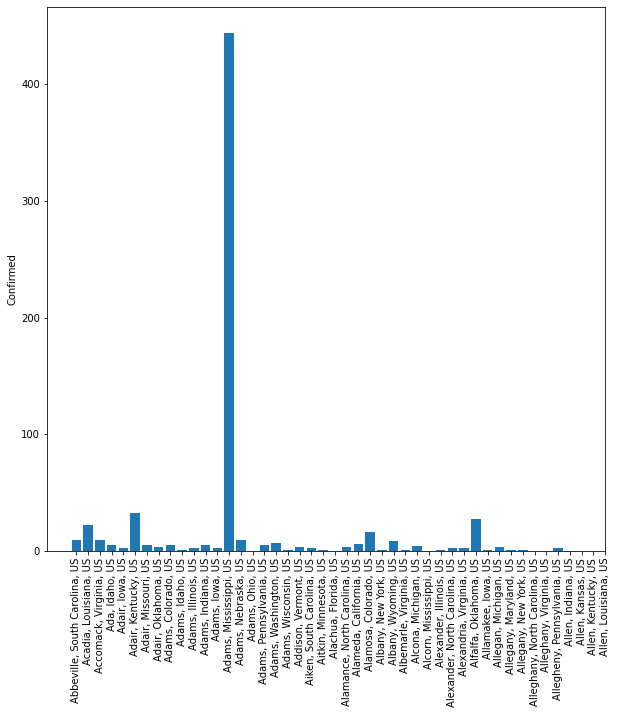

In [564]:
fig,ax= plt.subplots(1,1,figsize=(10,10))

ax.bar(range(46),df1[df1.columns[3]][0:46])
ax.set_xticks(range(46))
_=ax.set_xticklabels((Regions), rotation='vertical', fontsize=10)
_=ax.set_ylabel(df1.columns[3])

**Question 5**: Write a function that takes a list of region names and the data structure from previous question and aggregate the fields over the regions, outputing a data structure that is otherwise identical to the input. Use this function to aggregate the data for each country.

In [565]:
# able to sum ordered plot data now (for say all of china, not just by city)
      # give it a list of regions and takes the data structure you have in 3 and 
      # takes a list of list of regions and converts that into a new data structure
      # at over those regions 
      # a way of going through and adding (aggregating) all, of china for example

# all were doing is taking the sum for each country and making a data set/structure
      # that is a sum for each country rather than having per region/state

In [566]:
df5 = pd.read_csv(all_files[0])

country_region = list(map(lambda x: x.split("\n")[0],df5[df5.columns[3]][0:-1]))
last_update = list(map(lambda x: x.split("\n")[0],df5[df5.columns[4]][0:-1]))

Latitude = df5[df5.columns[5]][0:-1]
Longitude = df5[df5.columns[6]][0:-1]
Coordinates = list(zip(Longitude,Latitude))

Confirmed = df5[df5.columns[7]][0:-1]
Deaths = df5[df5.columns[8]][0:-1]
Recovered = df5[df5.columns[9]][0:-1]
Active = df5[df5.columns[10]][0:-1]

df5["country region"]=country_region+[0.]
df5["Last Update"]=last_update+[0.]

df5["Coordinates"]=Coordinates+[0.]

df5["confirmed"]=Confirmed+[0.]
df5["deaths"]=Deaths+[0.]
df5["recovered"]=Recovered+[0.]
df5["active"]=Active+[0.]

df5[df5.columns[12:19]]

,country region,Last Update,Coordinates,confirmed,deaths,recovered,active
0,US,2020-05-24 02:32:43,"(-82.46170658, 34.22333378)",35.0,0.0,0.0,35.0
1,US,2020-05-24 02:32:43,"(-92.41419698, 30.295064899999996)",289.0,15.0,0.0,274.0
2,US,2020-05-24 02:32:43,"(-75.63234615, 37.76707161)",722.0,11.0,0.0,711.0
3,US,2020-05-24 02:32:43,"(-116.24155159999998, 43.4526575)",794.0,23.0,0.0,771.0
4,US,2020-05-24 02:32:43,"(-94.47105874, 41.33075609)",7.0,0.0,0.0,7.0
...,...,...,...,...,...,...,...
3401,Vietnam,2020-05-24 02:32:43,"(108.277199, 14.058323999999999)",325.0,0.0,267.0,58.0
3402,West Bank and Gaza,2020-05-24 02:32:43,"(35.2332, 31.9522)",423.0,3.0,348.0,72.0
3403,Yemen,2020-05-24 02:32:43,"(48.516388, 15.552726999999999)",212.0,39.0,11.0,162.0
3404,Zambia,2020-05-24 02:32:43,"(27.849332, -13.133897)",920.0,7.0,336.0,577.0


In [567]:
df15 = {"Country_Region" : { "Last_Update":[6],
                            "Lat":[],
                            "Long_":[],
                            "Confirmed":[],
                            "Deaths":[],
                            "Recovered":[]
                            }
     }
df15 = pd.read_csv(all_files[5])

df25 = df1
df25 = pd.read_csv(all_files[6])

dt5 = {"Country_Region" : { "Last_Update":[df15*6],
                            "Lat":[df15],
                            "Long_":[df15],
                            "Confirmed":[df15],
                            "Deaths":[df15],
                            "Recovered":[df15]
                            ,
                            "Last_Update":[df25],
                            "Lat":[df25],
                            "Long_":[df25],
                            "Confirmed":[df25],
                            "Deaths":[df25],
                            "Recovered":[df25]
                          }
     }
dt5 = (df1,df2)
dt5

(    Province/State  Country/Region    Last Update  Confirmed  Deaths  Recovered
 0            Anhui  Mainland China  1/23/20 17:00        9.0     NaN        NaN
 1          Beijing  Mainland China  1/23/20 17:00       22.0     NaN        NaN
 2        Chongqing  Mainland China  1/23/20 17:00        9.0     NaN        NaN
 3           Fujian  Mainland China  1/23/20 17:00        5.0     NaN        NaN
 4            Gansu  Mainland China  1/23/20 17:00        2.0     NaN        NaN
 5        Guangdong  Mainland China  1/23/20 17:00       32.0     NaN        2.0
 6          Guangxi  Mainland China  1/23/20 17:00        5.0     NaN        NaN
 7          Guizhou  Mainland China  1/23/20 17:00        3.0     NaN        NaN
 8           Hainan  Mainland China  1/23/20 17:00        5.0     NaN        NaN
 9            Hebei  Mainland China  1/23/20 17:00        1.0     1.0        NaN
 10    Heilongjiang  Mainland China  1/23/20 17:00        2.0     NaN        NaN
 11           Henan  Mainlan

**Question 6**: Develop an algorithm that identifies when COVID infections started in each region. Create a time ordered list of regions and countries of when COVID started.


In [568]:
a = df[df.columns[12:19]]
b = np.min(df[df.columns[12:19]])
print(a,b)

              Last Update                        Regions  ... recovered  active
0     2020-05-24 02:32:43  Abbeville, South Carolina, US  ...       0.0    35.0
1     2020-05-24 02:32:43          Acadia, Louisiana, US  ...       0.0   274.0
2     2020-05-24 02:32:43         Accomack, Virginia, US  ...       0.0   711.0
3     2020-05-24 02:32:43                 Ada, Idaho, US  ...       0.0   771.0
4     2020-05-24 02:32:43                Adair, Iowa, US  ...       0.0     7.0
...                   ...                            ...  ...       ...     ...
3401  2020-05-24 02:32:43                        Vietnam  ...     267.0    58.0
3402  2020-05-24 02:32:43             West Bank and Gaza  ...     348.0    72.0
3403  2020-05-24 02:32:43                          Yemen  ...      11.0   162.0
3404  2020-05-24 02:32:43                         Zambia  ...     336.0   577.0
3405                    0                              0  ...       NaN     NaN

[3406 rows x 7 columns] confirmed      

**Question 7**: Develop an algorithm that identifies peaks in COVID infections. Use the algorithm to create lists of regions ordered by when peaks occured. Create ordered lists for regions for the first and second wave.

In [569]:
# same as 6 but much more difficult in that after its sorted, now you should apply
# an algorithm to help identify the peaks in the infections, which will then be used 
# and modified to determine when the first and second waves hit each region and in
# order they hit.

# this one is the least important question

In [570]:
a = df[df.columns[12:19]]
b = np.max(df[df.columns[15:16]])
print(a,b)

              Last Update                        Regions  ... recovered  active
0     2020-05-24 02:32:43  Abbeville, South Carolina, US  ...       0.0    35.0
1     2020-05-24 02:32:43          Acadia, Louisiana, US  ...       0.0   274.0
2     2020-05-24 02:32:43         Accomack, Virginia, US  ...       0.0   711.0
3     2020-05-24 02:32:43                 Ada, Idaho, US  ...       0.0   771.0
4     2020-05-24 02:32:43                Adair, Iowa, US  ...       0.0     7.0
...                   ...                            ...  ...       ...     ...
3401  2020-05-24 02:32:43                        Vietnam  ...     267.0    58.0
3402  2020-05-24 02:32:43             West Bank and Gaza  ...     348.0    72.0
3403  2020-05-24 02:32:43                          Yemen  ...      11.0   162.0
3404  2020-05-24 02:32:43                         Zambia  ...     336.0   577.0
3405                    0                              0  ...       NaN     NaN

[3406 rows x 7 columns] confirmed    33